In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.__version__

'2.7.0'

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

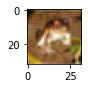

In [11]:
plot_sample(0)

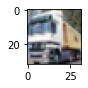

In [12]:
plot_sample(1)

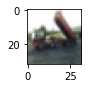

In [13]:
plot_sample(2)

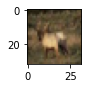

In [14]:
plot_sample(3)

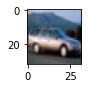

In [15]:
plot_sample(4)

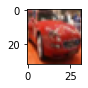

In [16]:
plot_sample(5)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
y_train[3]

array([4], dtype=uint8)

In [19]:
classes[y_train[3][0]]

'deer'

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [22]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [23]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
y_test_categorial = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32')

In [25]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8114 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6247 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5400 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4818 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4327 - accuracy: 0.4964


In [26]:
model.predict(X_test_scaled)[0]

array([0.23033988, 0.31279024, 0.6542376 , 0.9129752 , 0.58246666,
       0.79937834, 0.86713684, 0.07435136, 0.40044948, 0.08950695],
      dtype=float32)

In [27]:
classes[y_test[0][0]]

'cat'

In [28]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1418/1563 [==========================>...] - ETA: 11s - loss: 1.8217 - accuracy: 0.3533

In [ ]:
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)